In [1]:
import torch
import torch.nn as nn
from dataloader import DataLoader
import numpy as np
import datetime
import matplotlib.pylab as plt

# Data

In [2]:
dl = DataLoader('~/.datasets/MNIST/')
train_img,train_labels = dl.get_data(kind='train')
test_img,test_labels = dl.get_data(kind='t10k')

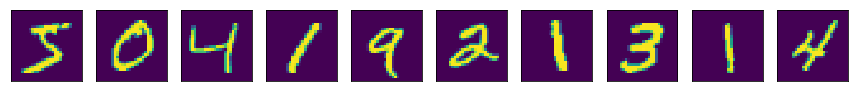

[[5], [0], [4], [1], [9], [2], [1], [3], [1], [4]]

In [3]:
DataLoader.show_images(train_img[0:10])
DataLoader.get_labels(train_labels[0:10])

In [4]:
num_samples, in_features = train_img.shape
test_samples, _ = test_img.shape
out_classes = 10

In [5]:
train_img = torch.from_numpy(train_img).float()
train_lab = torch.from_numpy(train_labels).float().view(-1,1)
test_img = torch.from_numpy(test_img).float()
test_lab = torch.from_numpy(test_labels).float().view(-1,1)

In [6]:
# 除以255做归一化
train_img_nd = train_img / 255
test_img_nd = test_img / 255

In [7]:
train_data = torch.cat((train_img_nd, train_lab), 1)

In [8]:
def data_iter(batch_size=100, kind='train'):
    if kind == 'train':
        return iter(torch.split(train_data, batch_size))
    else:
        return iter(torch.split(test_data, batch_size))

In [9]:
def accuracy(y_softmax, y):
    _, y_pred = torch.max(y_softmax,1,keepdim=True)
    y = y.view(-1,1)
    accu = torch.sum(y_pred==y).item()
    return accu

# Model
$$\boldsymbol{\hat y} = net({\boldsymbol x}) = softmax({\boldsymbol{x}}\ {W} + {\boldsymbol{b}})$$

In [10]:
class LogisticRegression(nn.Module):
    def __init__(self, in_features, out_classes):
        super().__init__()
        self.linear = nn.Linear(in_features, out_classes)
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, X):
        out = self.linear(X)
        out = self.softmax(out)
        return out

In [11]:
model = LogisticRegression(in_features, out_classes)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.9, momentum=0.9)

# Train

In [12]:
epochs = 5
t1 = datetime.datetime.now()

for e in range(epochs):
    train_loss = 0
    train_accu = 0
    
    for data in data_iter():
        X = data[:,:-1]
        y = data[:,-1].long()
        
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        train_accu += accuracy(y_pred, y)
        
    train_loss /= num_samples
    train_accu /= num_samples
    
    print("epoch[{}]: loss = {:.4f}, accuracy = {:.4f}%".format(e+1, train_loss, train_accu*100))

print("Training time: {}".format(datetime.datetime.now()-t1))

epoch[1]: loss = 0.0161, accuracy = 85.8750%
epoch[2]: loss = 0.0155, accuracy = 90.9833%
epoch[3]: loss = 0.0155, accuracy = 91.5983%
epoch[4]: loss = 0.0154, accuracy = 92.1300%
epoch[5]: loss = 0.0154, accuracy = 92.4433%
Training time: 0:00:00.798036


# Test

In [13]:
model.eval()

y_pred = model(test_img_nd)
y = test_lab.long()
accu = accuracy(y_pred, y)
print("accuracy = {:.4f}%".format(accu/test_samples*100))

accuracy = 91.3700%
